In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.optimize import curve_fit

# Unintegrated crystallization peak data
capdat1 = [-0.6133937,-0.6135637,-0.6139707,-0.6131695,-0.6129645,-0.61333,-0.6137806,-0.6134954,-0.6144756,-0.614489,-0.6149926,-0.6145208,-0.6145362,-0.6145902,-0.614807,-0.6145832,-0.6140704,-0.6138608,-0.6140849,-0.6135178,-0.6141209,-0.6140926,-0.6148834,-0.6139914,-0.6138515,-0.6136062,-0.6133528,-0.6136704,-0.6134617,-0.6135902,-0.6138661,-0.6141619,-0.6137027,-0.6141223,-0.6138407,-0.613093,-0.6142788,-0.6144332,-0.6137304,-0.6140756,-0.6128357,-0.6135811,-0.613504,-0.6132165,-0.6120806,-0.6112373,-0.6110389,-0.6115911,-0.611475,-0.6116885,-0.611375,-0.6110762,-0.6106536,-0.6106994,-0.610445,-0.61013,-0.6101377,-0.6100196,-0.60981,-0.6096188,-0.6094342,-0.6090557,-0.609288,-0.6088856,-0.6088691,-0.6087743,-0.6087066,-0.6086818,-0.6079096,-0.6079532,-0.6070378,-0.6070766,-0.6068362,-0.6063054,-0.6068106,-0.6064266,-0.6061731,-0.6063877,-0.6063766,-0.6060887,-0.6061608,-0.6062246,-0.6058533,-0.6061048,-0.6063,-0.6062686,-0.6048479,-0.6053805,-0.6054707,-0.6046661,-0.6046578,-0.6048194,-0.6045623,-0.6051258,-0.6054113,-0.6055237,-0.6055365,-0.6054765,-0.6054829,-0.6055715,-0.6055615,-0.60554,-0.6052436,-0.604801,-0.6049278,-0.6051635,-0.6048134,-0.6049756,-0.6056463,-0.605375,-0.6056434,-0.6057473,-0.6061719,-0.6062651,-0.606303,-0.6058684,-0.60543,-0.6057842,-0.605816,-0.606926,-0.6063105,-0.6057943,-0.6051049,-0.6053234,-0.6058668,-0.6062263,-0.6067773,-0.6067141,-0.6065072,-0.6059541,-0.605341,-0.5952193,-0.5320856,-0.4039853,-0.2508037,-0.05445263,0.1335608,0.3801223,0.6606032,0.9793731,1.345045,1.749686,2.216428,2.73701,3.304993,3.907666,4.58564,5.311409,6.098828,6.927524,7.807343,8.775391,9.780688,10.86302,12.00138,13.16872,14.39297,15.49606,16.50272,17.50504,18.53498,19.53248,20.49258,21.3837,22.33897,23.22537,24.1092,25.05392,26.00178,26.89976,27.76666,28.61802,29.50509,30.39581,31.28826,32.20822,33.11808,34.06185,35.00863,35.96565,36.98891,38.03678,39.08966,40.1471,41.17816,42.21078,43.19851,44.12214,44.98958,45.82526,46.61234,47.36724,48.13506,48.87032,49.59902,50.29449,51.00286,51.6497,52.292,52.93964,53.53122,54.1047,54.65387,55.18576,55.73342,56.29291,56.82461,57.35274,57.89016,58.4086,58.92639,59.40283,59.86972,60.30912,60.70622,61.06404,61.36982,61.6355,61.88111,62.0666,62.2,62.30713,62.35526,62.35459,62.25552,62.02229,61.72318,61.29832,60.72726,60.02242,59.3306,58.62966,57.91186,57.17266,56.44763,55.71709,54.98852,54.26009,53.56476,52.84488,52.1565,51.47904,50.7937,50.12955,49.42602,48.75322,48.06021,47.37662,46.6697,45.99447,45.29172,44.58465,43.8892,43.14389,42.39856,41.6565,40.90572,40.14468,39.375,38.578,37.82794,37.08045,36.34475,35.62462,34.93861,34.25552,33.59617,32.95874,32.33444,31.7418,31.13193,30.5416,29.94786,29.30292,28.58683,27.83601,27.08488,26.30082,25.54379,24.8284,24.09582,23.39845,22.71268,22.0643,21.41671,20.78348,20.16508,19.60198,19.02978,18.46825,17.91423,17.39429,16.89835,16.38456,15.89808,15.4404,14.97969,14.53482,14.10743,13.68294,13.27328,12.87945,12.48953,12.1184,11.76098,11.40981,11.07206,10.7418,10.40189,10.10247,9.794919,9.496215,9.219835,8.921712,8.65778,8.417824,8.135847,7.880228,7.646272,7.41862,7.200186,6.968628,6.738838,6.542524,6.341378,6.134661,5.951588,5.76026,5.577188,5.397448,5.230559,5.065676,4.914097,4.747434,4.608964,4.451234,4.302478,4.166992,4.036376,3.891935,3.781944,3.64422,3.537664,3.412731,3.298718,3.194406,3.082648,2.979344,2.87923,2.778993,2.68923,2.591947,2.513881,2.424585,2.339174,2.254025,2.169437,2.100534,2.023792,1.95442,1.882822,1.817193,1.748617,1.676853,1.628646,1.55879,1.494712,1.448372,1.392758,1.329853,1.292283,1.226817,1.196216,1.144201,1.099261,1.040807,0.9989251,0.9468184,0.9212541,0.8875516,0.839567,0.8031934,0.7717347,0.7318506,0.6945502,0.6675952,0.6359502,0.6043652,0.5727563,0.5285054,0.4963754,0.4757483,0.4563094,0.4350602,0.409388,0.3784101,0.3598139,0.3320214,0.3087282,0.290514,0.275261,0.2567183,0.2319824,0.2133985,0.1829636,0.1704789,0.1536243,0.1402306,0.1294,0.09199112,0.07783904,0.06287676,0.05137828,0.04397996,0.03449377,0.01807801,5.33E-04,-0.01692334,-0.02682347,-0.04657109,-0.0541923,-0.06145284,-0.06793208,-0.08047622,-0.0967745,-0.1075292,-0.1180874,-0.1237114,-0.1311843,-0.1411956,-0.1529436,-0.1680254,-0.1768701,-0.1845492,-0.1896606,-0.2019225,-0.2070682,-0.2163818,-0.2231995,-0.2294122,-0.2356228,-0.2404636,-0.2455856,-0.2519278,-0.2589182,-0.2650952,-0.2709725,-0.276566,-0.2807924,-0.2862881,-0.2921578,-0.2981873,-0.3048116,-0.3096956,-0.3185844,-0.3304044,-0.3334796,-0.3404909,-0.3434598,-0.347171,-0.3520859,-0.356097,-0.360342,-0.3635969,-0.3672314,-0.3702768,-0.3731572,-0.3761462,-0.3813498,-0.3864812,-0.3913978,-0.3951702,-0.3978051,-0.4000159,-0.4035039,-0.4087344,-0.4105394,-0.414055,-0.4177885,-0.4207136,-0.4238953,-0.4265122,-0.4279328,-0.4300043,-0.431565,-0.433122,-0.4355936,-0.4384622,-0.4406626,-0.442377,-0.4445706,-0.4461884,-0.4486344,-0.4499952,-0.4514421,-0.453286,-0.4547014,-0.4573053,-0.4590284,-0.4604507,-0.4620035,-0.462952,-0.4644248,-0.4656057,-0.4668696,-0.4687341,-0.4722153,-0.4732871,-0.4746588,-0.4746752,-0.4761484,-0.4771052,-0.4784731,-0.4792791,-0.481061,-0.4821098,-0.4833579,-0.4840276,-0.485213,-0.4864276,-0.4876821,-0.4890421,-0.4899294,-0.4896931,-0.4900857,-0.4905694,-0.491685,-0.4923242,-0.4932086,-0.4936194,-0.495054,-0.4966978,-0.497578,-0.4979766,-0.4988768,-0.499257,-0.499803,-0.5001568,-0.5009792,-0.5012609,-0.502697,-0.502526,-0.5030022,-0.5036512,-0.504192,-0.5040942,-0.504281,-0.5050618,-0.5054445,-0.5063233,-0.5062957,-0.507309,-0.5076804,-0.5069757,-0.5073459,-0.5095062,-0.5085182,-0.50952,-0.5105462,-0.5106947,-0.5109185,-0.5115387,-0.5118634,-0.5116457,-0.511738,-0.5123389,-0.5134563,-0.5140754,-0.5144326,-0.5143056,-0.515624,-0.5159036,-0.515575,-0.51538,-0.5160994,-0.516934,-0.5167472,-0.5169971,-0.5169856,-0.5177348,-0.5174574,-0.5167813,-0.5167353,-0.517163,-0.5177286,-0.5180108,-0.5180951,-0.5179359,-0.5176081,-0.5178539,-0.5183102,-0.517747,-0.5172617,-0.5174609,-0.5176726,-0.5177231,-0.5181992,-0.5172045,-0.5175994,-0.5165865,-0.5169592,-0.5177089,-0.5184912,-0.5182171,-0.5177337,-0.5176826,-0.5181058,-0.51844,-0.518528,-0.5184944,-0.518814,-0.5188644,-0.5189796,-0.5184288,-0.5184104,-0.5179744,-0.5182268,-0.5188072,-0.5186863,-0.5186488,-0.518727,-0.5180824,-0.5179054,-0.5174859,-0.5182305,-0.5175416,-0.5178592,-0.5175926,-0.517483,-0.516866,-0.5169781,-0.5168967,-0.516949,-0.5165836,-0.5160004,-0.5160428,-0.5161284,-0.515832,-0.516493,-0.5171346,-0.5175791,-0.5174426,-0.5164664,-0.5161686,-0.5156194,-0.5157556,-0.5159198,-0.5161328,-0.5168295,-0.5161313,-0.5161444,-0.516177,-0.5160997,-0.5162144,-0.5158822,-0.5158848,-0.5161646,-0.516575,-0.5167883,-0.5168409,-0.5164524,-0.516185,-0.5164739,-0.5168056,-0.5165019,-0.5168952,-0.5168367,-0.5172047,-0.5170398,-0.5167407,-0.5167185,-0.5170044,-0.5174304,-0.517271,-0.5169048,-0.5168908,-0.517724,-0.5176389,-0.5179926,-0.5178398,-0.5181794,-0.518859,-0.5177264,-0.5181133,-0.5179024,-0.5180072,-0.518193,-0.519135,-0.5190352,-0.5202363,-0.5200675,-0.5202994,-0.520263,-0.5198432,-0.519735,-0.5195903,-0.5197168,-0.5197187,-0.5192654,-0.5196618,-0.5192272,-0.519335,-0.5193611,-0.51884,-0.5193226,-0.5206443,-0.5197772,-0.519334,-0.5190162,-0.51844,-0.5190082,-0.5194188,-0.5191696,-0.5185451,-0.5188354,-0.5196094,-0.5188683,-0.5187822,-0.5178531,-0.5176541,-0.5173706,-0.5178111,-0.5179624,-0.5182433,-0.5187588,-0.5188622,-0.5184302,-0.5182415,-0.5189258,-0.5179028,-0.518545,-0.5187992,-0.5184452,-0.5186206,-0.5195989,-0.51997,-0.5199549,-0.5201422,-0.5199383,-0.5201574,-0.5203813,-0.5206604,-0.5203656,-0.5201038,-0.520242,-0.5188922,-0.5193765,-0.5199232,-0.5201101,-0.5195556,-0.5196566,-0.5199307,-0.5202324,-0.5207958,-0.5207002,-0.5202822,-0.5213256,-0.5212127,-0.521017,-0.520479,-0.5204055,-0.5204583,-0.5203455,-0.5201488,-0.5200344,-0.5198084,-0.5199246,-0.5205774,-0.5202228,-0.5203746,-0.5208917,-0.5209765,-0.5209446,-0.5209648,-0.521255,-0.5205542,-0.5219059,-0.5209276,-0.5209415,-0.5204504,-0.5204996,-0.520725,-0.5204992,-0.5208174,-0.5203912,-0.5201974,-0.5204258,-0.5205403,-0.5204492,-0.5201598,-0.5208015,-0.5211388,-0.5216224,-0.5214352,-0.5211922,-0.5209275,-0.5213374,-0.5219536,-0.5222778,-0.5224204,-0.5220696,-0.5217048,-0.5218474,-0.5240098,-0.5246174,-0.5244711,-0.524423,-0.52439,-0.523222,-0.5237604,-0.5234339,-0.524175,-0.5231947,-0.5232058,-0.523257,-0.5234293,-0.5223134,-0.5222614,-0.5222229,-0.5215864,-0.5218002,-0.520897,-0.521169,-0.520994,-0.5211119,-0.5208628,-0.5204114,-0.5205106,-0.5201374,-0.5202703,-0.5195933,-0.5198626,-0.5187494,-0.5192867,-0.519686,-0.5195484,-0.5189612,-0.5183568,-0.518205,-0.5184791,-0.5184833,-0.5191582,-0.5189706,-0.5191834,-0.5191124,-0.5191955,-0.5196363,-0.5193645,-0.5187769,-0.5181984,-0.518919,-0.5188758,-0.5187356,-0.5190354,-0.5197933,-0.51974,-0.519367,-0.5192662,-0.519269,-0.5195152,-0.5192347,-0.5192705,-0.51981,-0.5195859,-0.5198708,-0.5208476,-0.5200676,-0.5195791,-0.5198038,-0.5200252,-0.5214766,-0.52132,-0.5213116,-0.5214432,-0.5209937,-0.5208398,-0.5205316,-0.5208276,-0.52062,-0.5205921,-0.5212354,-0.5207859,-0.5210348,-0.519838,-0.5196485,-0.5199859,-0.5215772,-0.5216412,-0.5212304,-0.5208406,-0.521432,-0.5208626,-0.520961,-0.5205488,-0.5202337,-0.5205436,-0.52068,-0.5220418,-0.5233774,-0.5232404,-0.5229205,-0.5223789,-0.5234531,-0.523607,-0.5236089,-0.522779,-0.5228019,-0.5230865,-0.5227756,-0.5229711,-0.5236308,-0.5237196,-0.5233116,-0.5227795,-0.5232508,-0.5233,-0.5238481,-0.5238974,-0.5243982,-0.5221938,-0.5222283,-0.522253,-0.5215649,-0.5212408,-0.5217341,-0.5207627,-0.5207453,-0.5214504,-0.5213824,-0.52309,-0.5213898,-0.5215126,-0.5218336,-0.5214771,-0.5213414,-0.521935,-0.5213858,-0.5214672,-0.5215502,-0.521001,-0.520534,-0.5203482,-0.5199438,-0.5206059,-0.5201975,-0.5202891,-0.519804,-0.5196412,-0.5197732,-0.5194381,-0.5196754,-0.5197363,-0.5198215,-0.5197609,-0.5199184,-0.5206541,-0.5200024,-0.52159,-0.5218158,-0.5218267,-0.5221962,-0.5212012,-0.5208772,-0.5204937,-0.5205396,-0.5215203,-0.5213056,-0.5216758,-0.5215937,-0.5218522,-0.5214008,-0.521234,-0.520748,-0.5206656,-0.5214903,-0.5217956,-0.521909,-0.5212576,-0.521261,-0.5214962,-0.5213666,-0.520924,-0.5212616,-0.5209518,-0.5213726,-0.5205954,-0.5206848,-0.521513,-0.5224694,-0.5222799,-0.5228096,-0.5227764,-0.5219696,-0.5216519,-0.5216668,-0.520655,-0.5209502,-0.5206802,-0.520813,-0.5200264]
# Reversed capillary data
revcapdat1 = capdat1[::-1]
# d/dx(k*x^n) = k*n*x^(n-1)


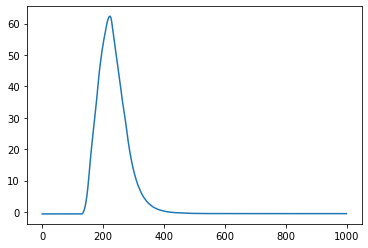

In [2]:
plt.plot(capdat1)
plt.show()

In [3]:
# Numerically integrate dataset with trapezoid rule
def num_integrate(data):
    #xval = list(range(0, len(data)))
    q = []
    for i in range (0, len(data)):
        q.append(np.trapz(data[0:i]))#, xval[0:i]))
    return q
# Linear function for baseline fit
def lin_func(x, k, b):
    return k*x+b

In [4]:
ydata = revcapdat1
xdata = np.arange(0, len(ydata), 1)
best_vals, covar =  curve_fit(lin_func, xdata, ydata)
# Baseline fit
bfit = []
for i in range (0, len(xdata)):
    bfit.append(lin_func(xdata[i], best_vals[0], best_vals[1]))

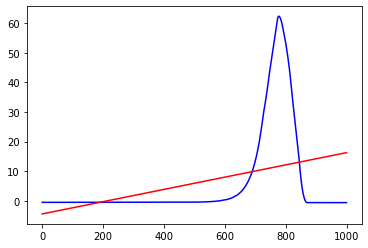

In [5]:
plt.plot(xdata, ydata, 'b', xdata, bfit, 'r')
plt.show()

In [6]:
# Baseline fit to first n% of input data
def baseline_n(data, n):
    # Number of points to fit
    pts = int(np.floor(len(data)*(n/100)))
    # x and y points for fit
    ydata = data[0:pts]
    xdata = np.arange(0, len(ydata), 1)
    # Fit to linear model
    best_vals, covar = curve_fit(lin_func, xdata, ydata)
    # Baseline fit points
    bfit = []
    bxpts = np.arange(0, len(data), 1)
    for i in range (0, len(data)):
        bfit.append(lin_func(bxpts[i], best_vals[0], best_vals[1]))
    return bfit
# Baseline subtraction using first n# of input data
def baseline_subtract_n(data, n):
    baseline = baseline_n(data, n)
    return np.subtract(data, baseline)
# Truncate data at max value
def truncate_max(data):
    # Location of max value
    maxloc = np.argmax(data)
    return data[0:maxloc]
# Normalize so that max value is at 0.5
def hnorm(data):
    # Max value multiplied by 2
    maxval = np.multiply(np.max(data), 2)
    return np.divide(data, maxval)
# Truncate data at some threshold value m
def threshold(data, m):
    retdat = []
    for i in range (0, len(data)):
        if data[i] < m:
            retdat.append(data[i])
        else:
            break
    return retdat

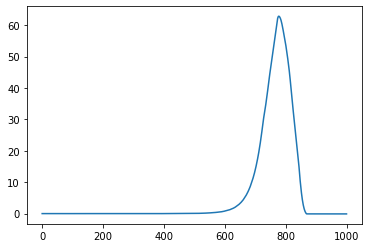

In [7]:
plt.plot(baseline_subtract_n(revcapdat1, 30))
#plt.plot(revcapdat1, 'r', baseline_n(revcapdat1, 30), 'g')
plt.show()

In [8]:
# Normalized data for 50% of heat peak
ndat = hnorm(truncate_max(baseline_subtract_n(revcapdat1, 30)))
nndat = hnorm(num_integrate(baseline_subtract_n(revcapdat1, 30)))*2
rnndat = hnorm(num_integrate(baseline_subtract_n(capdat1, 10)))*2


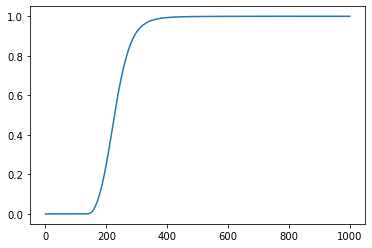

In [9]:
plt.plot(rnndat)
plt.show()

In [10]:
# Define avrami model as piecewise function 
# Function returns 0 for x < t (zero before t0)
# Function returns normal avrami model otherwise
def piecewise_avrami(x, k, t, n):
    if x < t: # Check if x < t
        return 0 # Return 0 if nucleation has not occured yet
    else:
        return 1-np.exp(-np.power(k*(x-t), n)) # Normal avrami model
# Vectorized version of avrami model
# Use this when fitting
def vect_p_av(x ,k, t, n):
    j = np.zeros(x.shape)
    for i in range(0, len(j)):
        j[i] = piecewise_avrami(x[i], k, t, n)
    return j    
# Define some polynomial function for fitting a heat peak
# Function returns 0 for x < t (zero before t0)
# Function returns polynomial otherwise
def polynomial(x, k, t, n):
    # n = 3 # Change if you want to change dimensionality
    if x < t: # Check if x < t
        return 0 # Return 0 if nucleation has not occured yet
    else:
        #return np.power((k*n*(x-t)), n-1)
        return np.power((k*(x-t)), n)
# Vectorized polynomial for fitting 
def vect_polynomial(x, k, t, n):
    j = np.zeros(x.shape)
    for i in range (0, len(j)):
        j[i] = polynomial(x[i], k, t, n)
    return j

# Fit input data set to polynomial model
# Biases fit so that it passes through last point and 0,0
def fit_to_polynomial(dat):
    x = list(range(0, len(dat))) # X values for fit
    y = list(dat) # Y values for fit (input data)
    for i in range (0, 1000): # Bias fit so that it always passes through the final point and 0,0
        x.append(x[-1])
        x.insert(0,0) 
        y.append(y[-1])
        y.insert(0,0)
    #best_vals, covar = curve_fit(vect_polynomial, x, y, bounds = ((-np.inf, 250, 1), (np.inf, 450, 5)))
    best_vals, covar = curve_fit(vect_polynomial, x, y, bounds = ((-np.inf, -np.inf, 1), (np.inf, np.inf, 5)))
    return best_vals, covar

In [11]:
best_vals, covar = fit_to_polynomial(threshold(rnndat, 0.05))

In [12]:
xval = np.arange(0, len(ndat))
yval = []
for i in range (0, len(ndat)):
    yval.append(polynomial(xval[i], best_vals[0],best_vals[1],best_vals[2]))

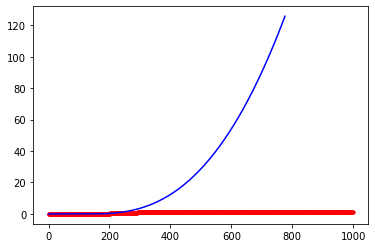

In [13]:
plt.plot(rnndat, 'r.', yval, 'b')
plt.show()

In [14]:
best_vals

array([9.77931124e-03, 1.34250085e+02, 2.63232840e+00])

In [15]:
q = []
for i in range (1, 10):
    best_vals, covar = fit_to_polynomial(threshold(nndat, 0.01*i))
    q.append(best_vals)

In [16]:
r = []
for i in range (1, 20):
    best_vals, covar = fit_to_polynomial(threshold(rnndat, 0.01*i))
    r.append(best_vals)

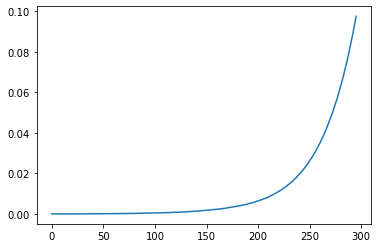

In [17]:
plt.plot(threshold(ndat, 0.1)[400:])
plt.show()

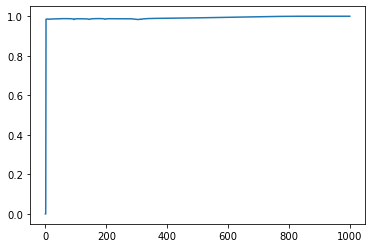

In [18]:
plt.plot(np.power(np.abs(nndat), 1/1000))
plt.show()

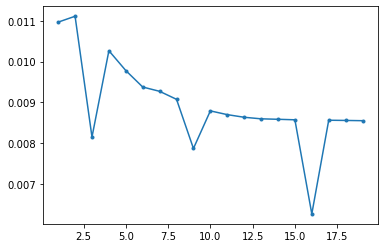

In [19]:
plt.plot(np.arange(1, 20),np.transpose(r)[0], marker = '.')
plt.show()

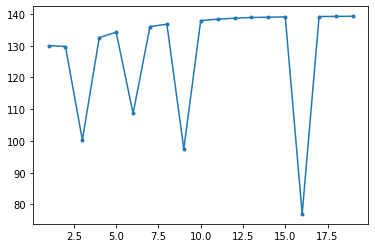

In [20]:
plt.plot(np.arange(1, 20),np.transpose(r)[1], marker = '.')
plt.show()

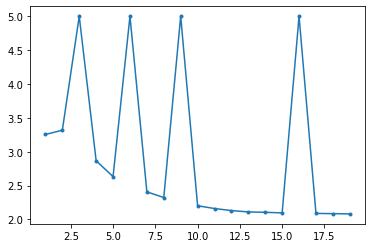

In [21]:
plt.plot(np.arange(1, 20),np.transpose(r)[2], marker = '.')
plt.show()

In [22]:
q

[array([1.82743319e-03, 4.11176063e+02, 5.00000000e+00]),
 array([1.41432452e-03, 3.31200005e+02, 4.99948525e+00]),
 array([2.35724783e-03, 4.58201097e+02, 4.99850455e+00]),
 array([1.57495578e-03, 3.45986346e+02, 4.99944795e+00]),
 array([1.93084078e-03, 4.02295174e+02, 4.99991888e+00]),
 array([2.05763980e-03, 4.16414012e+02, 4.99985434e+00]),
 array([1.53325457e-03, 3.15683269e+02, 4.99943262e+00]),
 array([1.61855789e-03, 3.31304491e+02, 4.99994349e+00]),
 array([1.62585389e-03, 3.28392086e+02, 4.99966951e+00])]

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.optimize import curve_fit

# Define some piecewise linear function
# Function returns 0 for x < t (zero before t0)
# Function returns linear function otherwise
def lin(x, k, t):
    n = 1 # Change if you want to change dimensionality
    if x < t: # Check if x < t
        return 0 # Return 0 if nucleation has not occured yet
    else:
        return np.power((k*(x-t)), n)

# Vectorized piecewise linear for fitting 
def vect_lin(x, k, t):
    j = np.zeros(x.shape)
    for i in range (0, len(j)):
        j[i] = lin(x[i], k, t)
    return j

# Truncate values below some threshold value (n)
# Provide data list and threshold 
def truncate_n(dat, n):
    out = []
    for i in range (0, len(dat)):
        if dat[i] < n:
            out.append(dat[i])
        else:
            break
    return out

# Return nth root of some value or list of values
def n_root(dat, n):
    return np.power(dat, 1/n)

# Return residual sum of linear piecewise model
# Input k and t fit parameters and data list used for fit
def lin_resid_sum(k, t, dat):
    q = []
    for i in range (0, len(dat)):
        q.append(lin(i, k, t))
    # Ignore data points before t0 for residual sum
    r = np.int(np.floor(t)+1)
    return np.sum(np.abs(np.subtract(q[r:], dat[r:])))

# Does same thing as lin_resid_sum except uses sum of squares of residuals
# Unused, doesn't seem to provide as sharp of a minimum in the curve check
##def lin_resid_sum_square(k, t, dat):
##    q = []
##    for i in range (0, len(dat)):
##        q.append(lin(i, k, t))
##    return np.sum(np.power(np.subtract(q, dat),2))

# Takes input data list,
# Truncates below some value, 
# Takes n-th root of list,
# Performs fit to piecewise linear function where function is 0 below some value t and 1st order polynomial otherwise,
# Returns sum of absolute values of fit residuals 
def fit_resid_sum(dat, n, threshold):
    tdat = truncate_n(dat, threshold) # Truncates input data list at some threshold
    rdat = n_root(tdat, n) # Takes n-th root of truncated data set
    x = list(range(0, len(rdat)))
    y = rdat
    best_vals, covar = curve_fit(vect_lin, x, y) # Fits rdat to piecewise linear function
    return lin_resid_sum(best_vals[0], best_vals[1], rdat)

# Does same thing as fit_resid_sum but with sum of squares of residuals instead of sum of absolute difference
# Unused, doesn't seem to provide as sharp of a minimum in the curve check
##def fit_resid_sum_square(dat, n, threshold):
##    tdat = truncate_n(dat, threshold) # Truncates input data list at some threshold
##    rdat = n_root(tdat, n) # Takes n-th root of truncated data set
##    x = list(range(0, len(rdat)))
##    y = rdat
##    best_vals, covar = curve_fit(vect_lin, x, y) # Fits rdat to piecewise linear function
##    return lin_resid_sum_square(best_vals[0], best_vals[1], rdat)

# Generates curve showing how poor a fit is at some given dimensionality
# Checks dimensionality from 1 to 3
# Lower value = better fit
# Input data list, cutoff threshold for data, and stepsize
# Try to use stepsizes that evenly divide into 3 (avoid using stepsizes like 0.83)
def dimensionality_check_curve(dat, threshold, stepsize):
    q = [2] # Creates list for index values, start with a nonzero value to prevent indexing error later
    while q[-1] < 3 + stepsize:
        q.append(q[-1]+stepsize)
    r = q[0:-1] # List of n values to check
    s = [] # List for fit residual sums
    for i in range(0, len(r)):
        s.append(fit_resid_sum(dat, r[i], threshold)) # Calculate all fit residual sums
    return [r, s] # Return list of n values and residual sums

# Returns dimensionality of some growth curve 
# Input data set, stepsize for check, and cutoff threshold
def dimensionality(dat, threshold, stepsize):
    q = dimensionality_check_curve(dat, threshold, stepsize)
    return q[0][np.argmin(q[1])]

In [24]:
data = [0,0.0000255962,0.0000651042,0.000118528,0.000187563,0.000274728,0.000381607,0.000510923,0.000664099,0.000842723,0.001051079,0.001291339,0.0015645,0.001877351,0.002226233,0.002620221,0.003058439,0.003539883,0.004068865,0.004651521,0.005288117,0.00597686,0.006729721,0.007544151,0.008415101,0.009353689,0.010354033,0.011407023,0.012530725,0.013697261,0.014925361,0.016209894,0.017542125,0.018929083,0.020380547,0.021888883,0.023444356,0.025064532,0.026741729,0.028465679,0.030256354,0.032104097,0.033997167,0.035969761,0.037975134,0.040049039,0.042180707,0.044358638,0.046596275,0.048908046,0.051282183,0.053704376,0.056203739,0.058765787,0.061375066,0.064064419,0.06681871,0.069622352,0.072528792,0.075469314,0.078497615,0.081597949,0.084752016,0.087979488,0.091301564,0.094700382,0.098156597,0.101713823,0.105352866,0.10905322,0.112862199,0.116760192,0.120723163,0.124823638,0.128966253,0.133226987,0.137581799,0.142002954,0.146516614,0.151151644,0.15587865,0.160669002,0.165584353,0.170598174,0.175679028,0.180882311,0.18616629,0.191487297,0.1969375,0.20238814,0.207936928,0.213548039,0.219181785,0.22486797,0.230639724,0.236460699,0.242293922,0.248211784,0.254181258,0.26016119,0.266213438,0.272292887,0.278358145,0.28451764,0.290624512,0.296785275,0.302958872,0.309105062,0.315258626,0.321456171,0.327660163,0.333830846,0.340038964,0.346243695,0.352403267,0.358588155,0.364761855,0.370890791,0.377086883,0.383201382,0.389342417,0.395470576,0.401546824,0.407604152,0.413676561,0.419725739,0.425712478,0.431707219,0.437677372,0.443587011,0.449503111,0.455389867,0.461211474,0.467071732,0.472827827,0.478580795,0.484292907,0.489927727,0.495517567,0.501095924,0.506632533,0.51209714,0.517555964,0.522976134,0.528327837,0.533674787,0.538984334,0.544225375,0.549491932,0.554661449,0.559829504,0.56496455,0.570035827,0.575074449,0.580109055,0.585105709,0.590033409,0.59495213,0.599833655,0.60465075,0.609460682,0.614231614,0.618935738,0.623658958,0.628287886,0.632906869,0.637489584,0.642010651,0.646497998,0.650977759,0.655422788,0.659807083,0.664182175,0.668520263,0.672796388,0.677064639,0.681298909,0.685472496,0.689661246,0.693764819,0.697856621,0.701912567,0.705909876,0.709871711,0.713824234,0.717746136,0.721612447,0.725469815,0.729295588,0.733066212,0.736826316,0.740555137,0.744230007,0.747913844,0.751518993,0.755111441,0.758670463,0.762175944,0.765648539,0.769108349,0.772534557,0.775908098,0.779269497,0.782597981,0.785875962,0.789144008,0.792381663,0.795570456,0.79876938,0.801902866,0.805027656,0.80812342,0.811169344,0.814185333,0.817190032,0.820165033,0.823093717,0.826009844,0.828896623,0.831738411,0.834568673,0.837370636,0.840127051,0.842886902,0.845583911,0.848268507,0.850927037,0.853543187,0.856134172,0.858715337,0.861270624,0.863784637,0.866288297,0.868765962,0.871201323,0.873624682,0.876020101,0.878372731,0.880725341,0.883020559,0.885297826,0.887541915,0.889737797,0.891898597,0.89403824,0.896144194,0.898203628,0.900241203,0.902244988,0.904203293,0.906138924,0.90803922,0.909894321,0.911739072,0.913528039,0.915294111,0.917029623,0.918725205,0.920392381,0.922040558,0.923658636,0.925237501,0.926795673,0.92832405,0.929814986,0.931287236,0.932732351,0.934142869,0.935545179,0.936906629,0.938252369,0.939574382,0.940865275,0.94213335,0.943386572,0.94461677,0.945816791,0.947001829,0.94816438,0.949298625,0.950419015,0.951518686,0.952591086,0.953656213,0.954689654,0.955709771,0.956711143,0.957688498,0.958646956,0.959593201,0.960522481,0.961429089,0.962323911,0.963201283,0.964057273,0.964902329,0.965729731,0.966535934,0.96733624,0.968110747,0.968874616,0.969624901,0.970355803,0.971071517,0.971777995,0.972470611,0.973145689,0.973811191,0.974463535,0.975099551,0.975726797,0.976342406,0.976942611,0.977538331,0.978116827,0.978687972,0.979248266,0.979795404,0.980332947,0.980864692,0.981387428,0.98189791,0.982402389,0.982898379,0.983382971,0.983861437,0.984331911,0.984792349,0.985250513,0.985695739,0.98613638,0.986569675,0.986992694,0.987408225,0.9878189,0.988221997,0.988615885,0.989005851,0.989388854,0.989761547,0.990129035,0.990488943,0.99083806,0.99118264,0.991514685,0.99184024,0.992157436,0.992464691,0.992763879,0.993056874,0.993341295,0.993616397,0.993886607,0.994148443,0.994399769,0.994645177,0.994883244,0.995112762,0.995337708,0.99555291,0.995762315,0.99596433,0.996158438,0.996346107,0.996527721,0.996703019,0.996871322,0.997033904,0.997191004,0.997341627,0.99748723,0.997627262,0.997761321,0.997892112,0.998016199,0.998135331,0.99824917,0.998358028,0.998462501,0.998562957,0.998658903,0.998750018,0.998837493,0.998920799,0.99899997,0.999076317,0.999149043,0.999217104,0.999282092,0.999343237,0.999401639,0.999456902,0.999508944,0.999557765,0.999603606,0.999646533,0.999686579,0.999724169,0.999759071,0.99979145,0.99982161,0.999849171,0.999874052,0.999896699,0.999916819,0.999934715,0.999950193,0.999963608,0.999974812,0.999983801,0.999990744,0.99999571,0.99999881,1,0.999949635]

In [285]:
dimensionality(data, 0.1, 0.1)

2.4000000000000012

In [293]:
plt.plot(rnndat[0:500])
plt.show()

In [299]:
dimensionality(np.abs(rnndat[0:500]), 0.1, 0.1)

1

In [341]:
#q = dimensionality_check_curve(np.abs(rnndat[0:500]), 0.1, 0.01)
q = dimensionality_check_curve(np.abs(nndat[300:]), 0.05, 0.1)

In [342]:
plt.plot(q[0],q[1])
plt.show()

In [10]:
alpha = []
r = []
for i in range (1, 20):
    r.append(dimensionality(np.abs(nndat), 0.01*i, 0.01))
    alpha.append(0.01*i)

In [11]:
plt.plot(alpha, r)
plt.xlabel('Fraction converted')
plt.ylabel('Found n value')
plt.show()

In [363]:
len(r)

99

In [355]:
len(r)

19